In [1]:
import sklearn
print(sklearn.__version__)

1.0.2


In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score
from sklearn.preprocessing import  StandardScaler,LabelEncoder
from pycaret.regression import RegressionExperiment
from pycaret.classification import *

In [36]:
data=pd.read_csv(input('enter the file name: '))
df=data.copy()
#difine the imputers
mean_imputer=SimpleImputer(strategy='mean',missing_values=np.nan)
mode_imputer=SimpleImputer(strategy='mode',missing_values=np.nan)
most_freq_imputer=SimpleImputer(strategy='most_frequent',missing_values=np.nan)
median_imputer=SimpleImputer(strategy='median',missing_values=np.nan)


#show the nulls in data
print(df)
print('the nulls in your data is:\n',df.isna().sum())


#if thier is a column that have no benfit and want to drop it
j=input('DO you want to drop columns?\n if yes input: yes\n if No input no\n')
if j=='yes':
    while True:
        k=input('enter the coloumn from the data that want to drop it(if thier is no column to drop enter Noun):\n ')
        if k in df.columns:
            df=df.drop(k,axis=1)
            print('your data now is:\n',df.isna().sum())
        elif k=='Noun':
            break
    print('we finish droping the columns')
elif j=='no': 
    print('let''s go to the next step')

print('-----------------------------------------------------------------------------')


#what is the tecq you want to full your nulls
q=input('for the numerical columns what do you want to use :\n1-for mean\n2-for mode\n3-mode median\n(enter the number): ')
i=0
h=len(df.columns)-1
while i <= h :
    if type(df[df.columns[i]])=='str'or'object'or 'bool' :
        df[df.columns[i]]=most_freq_imputer.fit_transform(df[df.columns[i]].values.reshape(-1,1))
        i+=1
    elif  type(df[df.columns[i]])=='int64'or'float'or 'complex':
        if q==1:
            df[df.columns[i]]=mean_imputer.fit_transform(df[df.columns[i]].values.reshape(-1,1))
            i+=1
        elif q==2:
            df[df.columns[i]]=median_imputer.fit_transform(df[df.columns[i]].values.reshape(-1,1))
            i+=1
        elif q==3:
            df[df.columns[i]]=mode_imputer.fit_transform(df[df.columns[i]].values.reshape(-1,1))
            i+=1
print('finsh full the nulls ')
('-----------------------------------------------------------------------------')
#LabelEncoder for columns

i=0
la=LabelEncoder()
h=len(df.columns)-1
while i <= h :
        if type(df[df.columns[i]])=='string'or'object':
            df[df.columns[i]]=la.fit_transform(df[df.columns[i]])
        i+=1
print(df)
#df=pd.get_dummies(df,drop_first=True)
print('-----------------------------------------------------------------------------')

#select the prediction feature & scale data 


enter the file name: StudentsPerformance.csv
     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                 

enter the feature name that you want to predict:  writing score


,Description,Value
0,Session id,123
1,Target,writing score
2,Target type,Regression
3,Original data shape,"(1000, 8)"
4,Transformed data shape,"(1000, 8)"
5,Transformed train set shape,"(800, 8)"
6,Transformed test set shape,"(200, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,3.0415,14.0550,3.7396,0.9357,0.1240,0.0862,0.0210
lr,Linear Regression,3.0415,14.1642,3.7583,0.9353,0.1180,0.0849,0.0080
ridge,Ridge Regression,3.0421,14.1629,3.7581,0.9353,0.1180,0.0849,0.0080
lar,Least Angle Regression,3.0415,14.1642,3.7583,0.9353,0.1180,0.0849,0.0090
br,Bayesian Ridge,3.0432,14.1653,3.7584,0.9353,0.1179,0.0850,0.0080
huber,Huber Regressor,3.0447,14.2013,3.7627,0.9352,0.1168,0.0843,0.0150
lightgbm,Light Gradient Boosting Machine,3.1839,15.1220,3.8790,0.9310,0.1399,0.0962,0.0650
xgboost,Extreme Gradient Boosting,3.3366,16.7841,4.0915,0.9230,0.1352,0.0954,0.0480
et,Extra Trees Regressor,3.3702,17.0874,4.1249,0.9216,0.1317,0.0957,0.0600
rf,Random Forest Regressor,3.4390,17.8201,4.2118,0.9183,0.1344,0.0973,0.0690


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='squared_error',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.7332,19.3971,4.4042,0.9148,0.2692,0.1166
1,3.6471,18.8546,4.3422,0.9262,0.1230,0.0995
2,3.3535,16.2038,4.0254,0.9328,0.1138,0.0885
3,2.9923,14.4980,3.8076,0.9309,0.1170,0.0873
4,3.2917,17.6832,4.2051,0.9134,0.1235,0.0803
5,3.0260,15.1725,3.8952,0.9186,0.0903,0.0669
6,3.4595,19.0206,4.3613,0.9178,0.1983,0.1118
7,3.2618,15.2092,3.8999,0.9286,0.1215,0.0859
8,3.2096,14.7086,3.8352,0.9263,0.1179,0.0953


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


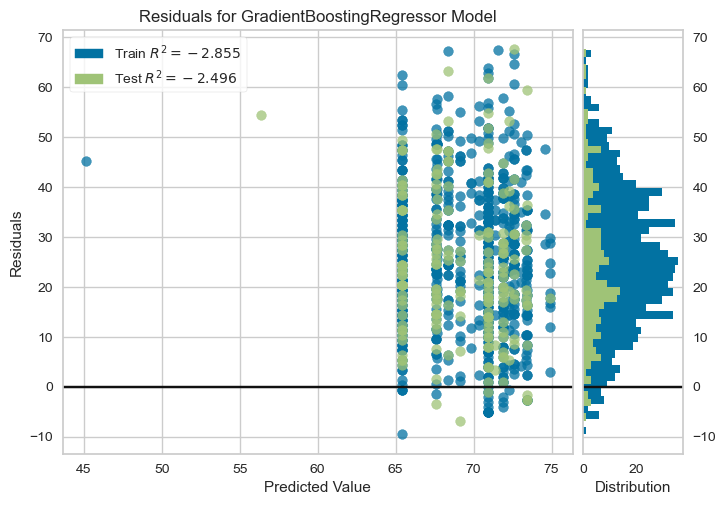

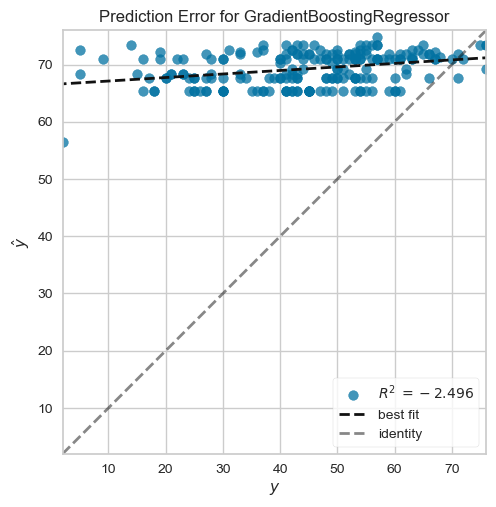

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.1
loss,squared_error
max_depth,3
max_features,None
max_leaf_nodes,None
min_impurity_decrease,0.0


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,5.3250,39.0500,6.2490,0.8285,0.2483,0.1525
1,4.4125,32.4875,5.6998,0.8729,0.1633,0.1252
2,4.1125,25.0125,5.0012,0.8963,0.1329,0.1057
3,3.8625,24.8875,4.9887,0.8815,0.1542,0.1129
4,5.4000,44.2000,6.6483,0.7835,0.1916,0.1329
5,4.4500,35.1750,5.9309,0.8113,0.1491,0.1032
6,4.8750,36.6000,6.0498,0.8418,0.2064,0.1468
7,4.8125,34.4375,5.8683,0.8384,0.2160,0.1274
8,4.7250,31.0500,5.5723,0.8444,0.1512,0.1281


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.9263,20.9686,4.5792,0.9079,0.2226,0.1155
1,3.5212,18.4179,4.2916,0.9279,0.1180,0.0927
2,3.4562,17.2964,4.1589,0.9283,0.1066,0.0894
3,3.0600,15.0380,3.8779,0.9284,0.1184,0.0907
4,3.7362,21.4494,4.6313,0.8949,0.1295,0.0887
5,3.8638,23.2999,4.8270,0.8750,0.1121,0.0874
6,3.2912,17.4554,4.1780,0.9246,0.1883,0.1084
7,3.3975,17.7265,4.2103,0.9168,0.1076,0.0858
8,3.2138,15.7159,3.9643,0.9213,0.1225,0.0958


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.9625,22.1375,4.7051,0.9028,0.2394,0.1139
1,4.1375,25.1375,5.0137,0.9016,0.1432,0.1097
2,3.5375,18.4875,4.2997,0.9234,0.1110,0.0919
3,3.3250,16.6000,4.0743,0.9209,0.1201,0.0933
4,3.9000,24.4750,4.9472,0.8801,0.1404,0.0969
5,3.7625,22.6625,4.7605,0.8784,0.1074,0.0832
6,3.8375,24.6625,4.9661,0.8934,0.1821,0.1184
7,3.5250,18.8000,4.3359,0.9118,0.1312,0.0915
8,3.4875,19.1375,4.3746,0.9041,0.1314,0.1014


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Accuracy:  0.9293557291959735


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.9621,13.6279,3.6916,0.9407,0.1074,0.0828


In [38]:
while True:
    Y=input('enter the feature name that you want to predict:  ')
    if Y in df.columns:
        break
    else:
        print('please,enter the feature name coorect')
x=df.drop([Y],axis=1)
y=df[Y]

# Deterymine the type of task based on the nature of the target variable
if (df[Y].nunique() <= 10):
    typ = 'clf'  # Classification task for binary target
else:
    typ = 'reg'  # Regression task for continuous or multiclass target

# Function to perform scaling
scl = StandardScaler()
x = scl.fit_transform(x)

if typ == 'reg':
    exp = RegressionExperiment()
else:
    exp = ClassificationExperiment()

exp.setup(data=df, target=Y, session_id=123, profile=False, train_size=0.8) # Setup an experiment

# Split your data into training and test sets (assuming X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

best_model = exp.compare_models()
print(best_model)  # Print the best model details

tune_bmodel = exp.tune_model(best_model) # Hyperparameter tune to enhance model

tune_bmodel.fit(X_train,y_train)

pred = tune_bmodel.predict(X_test) # Making predctions of X_test

# Making plots
# REsiduals plot
exp.plot_model(tune_bmodel)

exp.plot_model(tune_bmodel, plot='error')

exp.plot_model(tune_bmodel, plot='parameter')

# making decision tree for ensemble (bagging is default method)
dt = exp.create_model('dt')
# making ensemble with bagging method
bagged_dt = exp.ensemble_model(dt)

# making ensemble with boosting method
boosted_dt = exp.ensemble_model(dt, method='Boosting')

# # Calculate and report the appropriate metric based on the task type
if typ == 'reg':
    # Regression task, calculate R-squared
    from sklearn.metrics import r2_score
    accuracy = r2_score(y_test, pred)
    print('Accuracy: ', accuracy)
else:
    # Classification task, calculate accuracy
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test,pred)
    print('Accuracy: ', accuracy)

if typ == 'reg':
  best_acc_model = exp.automl(optimize='R2')
  holdout_pred = exp.predict_model(best_acc_model)
else:
  best_acc_model = exp.automl(optimize='Accuracy')
  holdout_pred = exp.predict_model(best_acc_model)